# Feature Engineering & Machine Learning Prédictif

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importation du csv DVF

In [2]:
dvf = pd.read_csv('Sprint1Data/dvf.csv', sep=',', low_memory=False)

## Partie 1 :Feature Engineering & Data Analysis round 2

### Exploration des données

In [3]:
dvf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224142 entries, 0 to 2224141
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id_mutation                object 
 1   date_mutation              object 
 2   nature_mutation            object 
 3   valeur_fonciere            float64
 4   adresse_nom_voie           object 
 5   nom_commune                object 
 6   code_departement           object 
 7   id_parcelle                object 
 8   nombre_lots                int64  
 9   code_type_local            float64
 10  type_local                 object 
 11  surface_reelle_bati        float64
 12  nombre_pieces_principales  float64
 13  surface_terrain            float64
 14  longitude                  float64
 15  latitude                   float64
 16  id_bien                    object 
dtypes: float64(7), int64(1), object(9)
memory usage: 288.5+ MB


In [4]:
dvf.describe()

,valeur_fonciere,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,2.224142e+06,2.224142e+06,1.348953e+06,1.223008e+06,1.346962e+06,1.875892e+06,2.171583e+06,2.171583e+06
mean,2.052168e+05,2.253525e-01,1.535372e+00,1.196465e+02,3.315520e+00,1.838143e+03,1.952514e+00,4.639342e+01
std,2.292359e+06,7.998093e-01,8.871148e-01,5.772342e+02,1.988447e+00,8.571996e+03,6.085189e+00,5.414858e+00
min,1.000000e-02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-6.315233e+01,-2.138595e+01
25%,4.166666e+04,0.000000e+00,1.000000e+00,6.400000e+01,2.000000e+00,2.410000e+02,-1.341860e-01,4.491790e+01
50%,1.200000e+05,0.000000e+00,1.000000e+00,8.800000e+01,4.000000e+00,5.170000e+02,2.266328e+00,4.714500e+01
75%,2.190000e+05,0.000000e+00,2.000000e+00,1.150000e+02,5.000000e+00,1.031000e+03,4.040598e+00,4.871642e+01
max,1.750000e+09,3.300000e+02,4.000000e+00,2.778140e+05,1.120000e+02,3.058525e+06,5.582859e+01,5.108207e+01


In [5]:
dvf.isnull().sum()

id_mutation                        0
date_mutation                      0
nature_mutation                    0
valeur_fonciere                    0
adresse_nom_voie                3087
nom_commune                        0
code_departement                   0
id_parcelle                        0
nombre_lots                        0
code_type_local               875189
type_local                    875189
surface_reelle_bati          1001134
nombre_pieces_principales     877180
surface_terrain               348250
longitude                      52559
latitude                       52559
id_bien                            0
dtype: int64

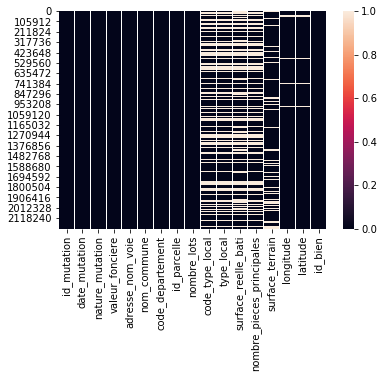

In [6]:
sns.heatmap(dvf.isnull())

### Remarques :

* On peut voir que :
  * les données dans la colonne `valeur_fonciere`ont un écart significatif
  * il y a encore beaucoup de NaN
* je peux supposer qu'il faudrait :
  * traiter les NaN : afin d'en faire une catégorie à part ===> comment / cb de cat 
  * voir pour ne garder que les colonnes qui sont corrélées à la target : `valeur_fonciere`
  * supprimer les données `nature_mutation` qui ne sont pas égales à des Ventes pour coller au besoin du client
  * créer une fourchette de prix

#### Récupération des données de vente seulement 

In [7]:
dvf['nature_mutation'].unique()

array(['Vente', 'Echange', 'Vente terrain à bâtir',
       "Vente en l'état futur d'achèvement", 'Adjudication',
       'Expropriation'], dtype=object)

In [8]:
dvf2 = dvf.loc[dvf['nature_mutation'].isin(['Vente','Vente terrain à bâtir',"Vente en l'état futur d'achèvement"])]

In [9]:
dvf2['nature_mutation'].unique()

array(['Vente', 'Vente terrain à bâtir',
       "Vente en l'état futur d'achèvement"], dtype=object)

#### Traitement des NaN de la colonne `type_local`

In [10]:
dvf2['type_local'] = dvf2['type_local'].fillna('None')

c:\users\amand\desktop\projetecole\sprint1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


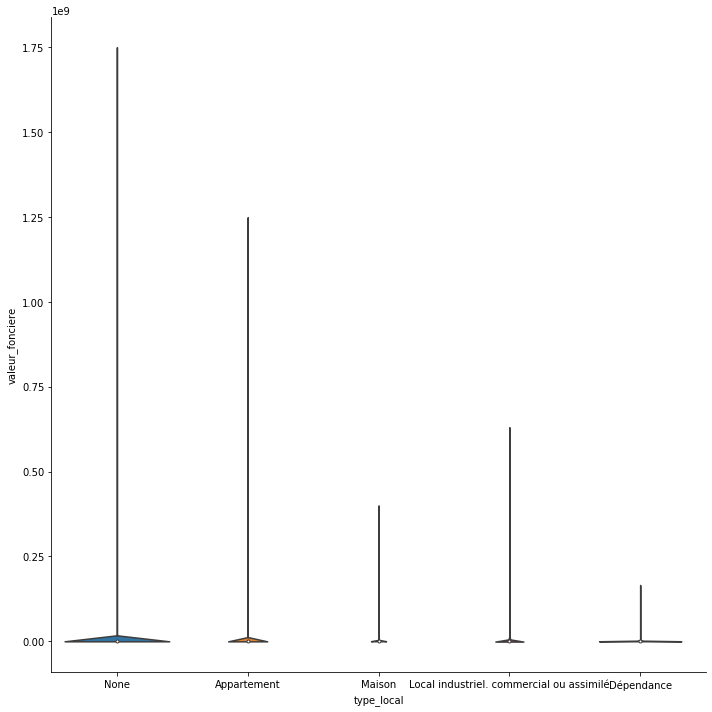

In [11]:
sns.catplot(x="type_local",y="valeur_fonciere",data=dvf2, kind='violin', height=10)

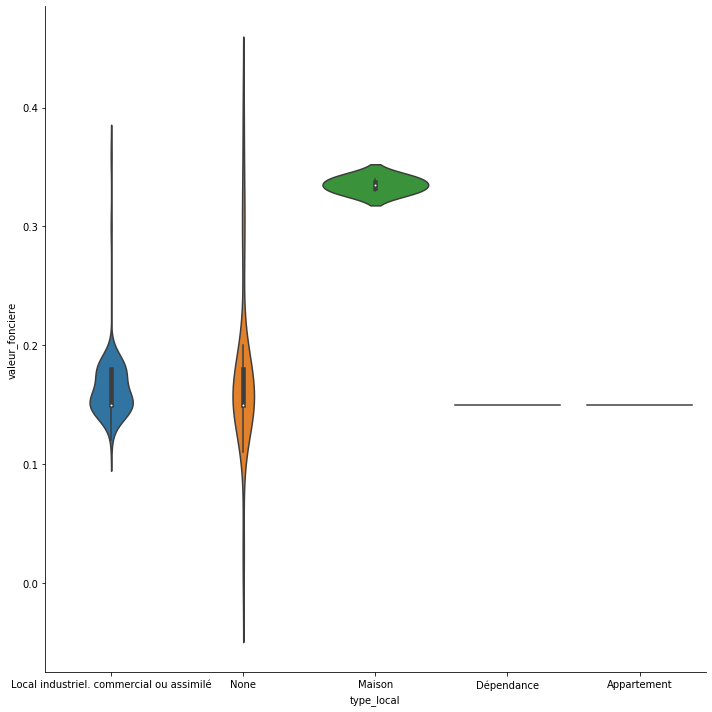

In [12]:
sns.catplot(x="type_local",y="valeur_fonciere",data=dvf2[dvf2['valeur_fonciere']<0.5], kind='violin', height=10)

### Remarques

Dans les `type_local` 'None' se rapprochent plus de 'Local industriel. commercial ou assimilé' on donc supposer que les 'None' en être.

On peut également se poser la question des valeurs extrêmes de `valeur_fonciere`

In [13]:
dvf2['type_local'] = dvf2['type_local'].replace('None', 'Local industriel. commercial ou assimilé')

c:\users\amand\desktop\projetecole\sprint1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
dvf2['type_local'].unique()

array(['Local industriel. commercial ou assimilé', 'Appartement',
       'Maison', 'Dépendance'], dtype=object)

In [15]:
dvf2['code_type_local'] = dvf2['code_type_local'].fillna(4)

c:\users\amand\desktop\projetecole\sprint1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
dvf2['code_type_local'].unique()

array([4., 2., 1., 3.])

In [17]:
dvf2['nombre_pieces_principales'] = dvf2['nombre_pieces_principales'].fillna(0)

c:\users\amand\desktop\projetecole\sprint1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Gestion des Outliers de `valeur_fonciere`

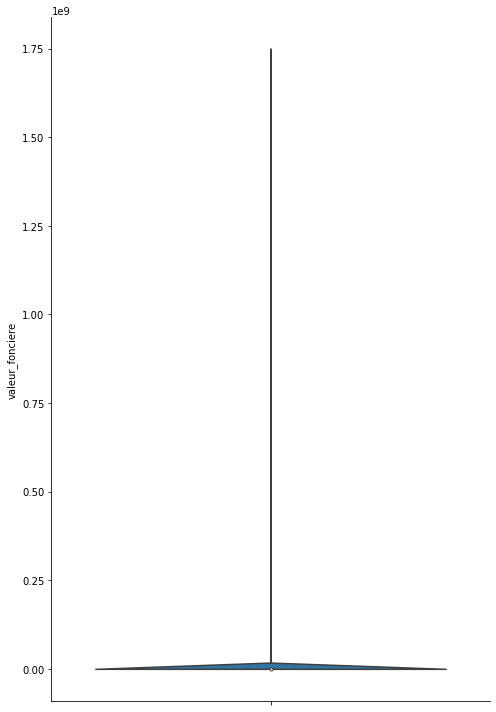

In [18]:
sns.catplot( y="valeur_fonciere",
                data=dvf2, kind="violin",
                height=10, aspect=.7)

In [19]:
dvf2.valeur_fonciere.describe()

count    2.192874e+06
mean     2.072833e+05
std      2.307654e+06
min      1.000000e-02
25%      4.500000e+04
50%      1.216505e+05
75%      2.200000e+05
max      1.750000e+09
Name: valeur_fonciere, dtype: float64

In [20]:
dvf2 = dvf2.loc[dvf2['valeur_fonciere'].between(45000, 220000)]
dvf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103600 entries, 0 to 2224129
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   id_mutation                1103600 non-null  object 
 1   date_mutation              1103600 non-null  object 
 2   nature_mutation            1103600 non-null  object 
 3   valeur_fonciere            1103600 non-null  float64
 4   adresse_nom_voie           1102392 non-null  object 
 5   nom_commune                1103600 non-null  object 
 6   code_departement           1103600 non-null  object 
 7   id_parcelle                1103600 non-null  object 
 8   nombre_lots                1103600 non-null  int64  
 9   code_type_local            1103600 non-null  float64
 10  type_local                 1103600 non-null  object 
 11  surface_reelle_bati        730190 non-null   float64
 12  nombre_pieces_principales  1103600 non-null  float64
 13  surface_terr

### Etude de la corrélation
* si le coefficient est proche de 1 c’est qu’il y a une forte corrélation positive
* si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
* si le coefficient est proche de 0 en valeur absolue c’est qu’il y a une faible corrélation.

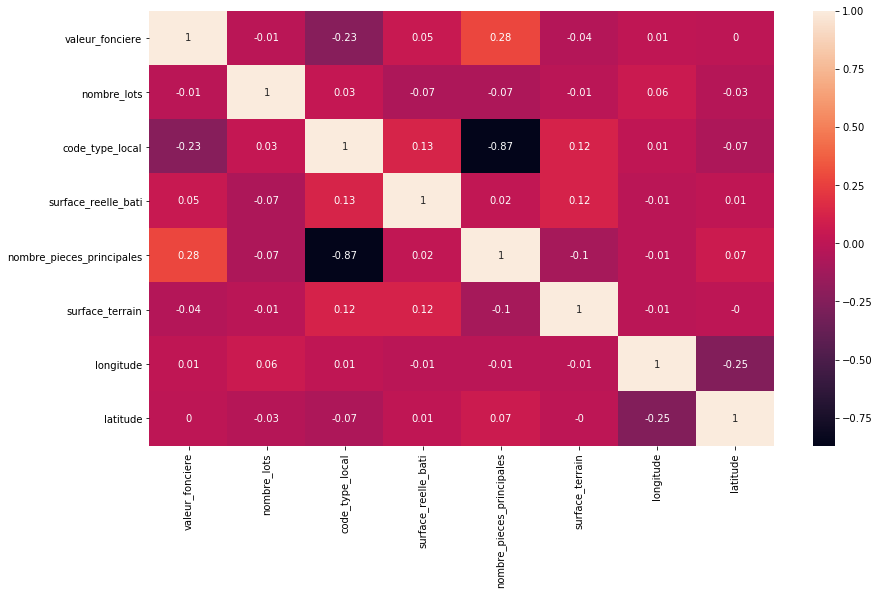

In [21]:
dvf_corr = dvf2.corr().round(2)
plt.figure(figsize=(14,8))
sns.heatmap(data=dvf_corr, annot=True)

### Remarques : 

* Correlation : La matrice montre une forte corrélation négative entre `nombre_pieces_principales` et `code_type_local`
* Feature selection :
    * `valeur_fonciere` qui est la target
    * `code_departement` les départements seront regroupés en régions
    * `type_local`
    * `nombre_pieces_principales`


### Mise en place d'un DF final pour les algorithmes


In [22]:
### Création de la colonne `regions`

In [23]:
listeNordEst=['02','08','10', '51', '52', '54', '55', '57','59', '60', '62', '67', '68', '70', '80', '88', '90']
listeNordOuest=['14', '22', '27', '28', '29', '35', '36', '37', '41', '44', '45', '49', '50', '53', '56', '61', '72', '76', '79', '85', '86']
listeSudEst=['01', '03', '04', '05', '06', '13', '18', '21', '25', '26', '38', '39', '42', '58', '69', '71', '73', '74', '83', '84', '89']
listeSudOuest=['2A', '2B', '07', '09', '11', '12', '15', '16', '17', '19', '23', '24', '30', '31', '32', '33', '34', '40', '43', '46', '47', '48', '63', '64', '65', '66', '81', '82', '87']
listeRegionParis=['75', '77', '78', '91', '92', '93', '94', '95']
listeDOMTOM=['971', '972', '973', '974']

In [24]:
dvf2['regions']=np.where(dvf2['code_departement'].isin(listeNordEst), 'NordEst', dvf2['code_departement'])

c:\users\amand\desktop\projetecole\sprint1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeNordOuest), 'NordOuest', dvf2['regions'])

c:\users\amand\desktop\projetecole\sprint1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeSudEst), 'SudEst', dvf2['regions'])

c:\users\amand\desktop\projetecole\sprint1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeSudOuest), 'SudOuest', dvf2['regions'])

c:\users\amand\desktop\projetecole\sprint1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeRegionParis), 'RegionParis', dvf2['regions'])

c:\users\amand\desktop\projetecole\sprint1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeDOMTOM), 'DOMTOM', dvf2['regions'])

c:\users\amand\desktop\projetecole\sprint1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
dvf2.regions.unique()

array(['SudEst', 'NordEst', 'SudOuest', 'NordOuest', 'RegionParis',
       'DOMTOM'], dtype=object)

In [31]:
### mise en place de dummies
to_dummies = pd.get_dummies(dvf2['type_local'])
to_dummies.head()

,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison
0,0,0,1,0
4,0,0,0,1
5,0,0,0,1
6,0,0,1,0
7,0,0,1,0


In [32]:
to_dummies2 = pd.get_dummies(dvf2['regions'])
to_dummies2.head()

,DOMTOM,NordEst,NordOuest,RegionParis,SudEst,SudOuest
0,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0
7,0,0,0,0,1,0


In [33]:
dvf2 = pd.concat([dvf2, to_dummies], axis=1)

In [34]:
dvf2 = pd.concat([dvf2, to_dummies2], axis=1)

In [35]:
dvf2['nombre_pieces_principales']=dvf2['nombre_pieces_principales'].astype('category')

In [36]:
dvf2.dtypes

id_mutation                                   object
date_mutation                                 object
nature_mutation                               object
valeur_fonciere                              float64
adresse_nom_voie                              object
nom_commune                                   object
code_departement                              object
id_parcelle                                   object
nombre_lots                                    int64
code_type_local                              float64
type_local                                    object
surface_reelle_bati                          float64
nombre_pieces_principales                   category
surface_terrain                              float64
longitude                                    float64
latitude                                     float64
id_bien                                       object
regions                                       object
Appartement                                   

In [37]:
dvf_prep=dvf2[['valeur_fonciere','SudEst', 'SudOuest', 'NordEst', 'NordOuest', 'RegionParis', 'DOMTOM', 'nombre_pieces_principales', 'Appartement', 'Dépendance',
                   'Local industriel. commercial ou assimilé', 'Maison']].reset_index(drop=True)
dvf_prep

,valeur_fonciere,SudEst,SudOuest,NordEst,NordOuest,RegionParis,DOMTOM,nombre_pieces_principales,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison
0,115000.0,1,0,0,0,0,0,0.0,0,0,1,0
1,175050.0,1,0,0,0,0,0,5.0,0,0,0,1
2,165900.0,1,0,0,0,0,0,4.0,0,0,0,1
3,181800.0,1,0,0,0,0,0,0.0,0,0,1,0
4,177000.0,1,0,0,0,0,0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1103595,210000.0,0,0,0,0,1,0,1.0,1,0,0,0
1103596,63000.0,0,0,0,0,1,0,0.0,0,1,0,0
1103597,146400.0,0,0,0,0,1,0,3.0,1,0,0,0
1103598,198000.0,0,0,0,0,1,0,1.0,1,0,0,0


## Partie 2 : Machine Learning Prédictif

### Import librairies 

In [38]:
from sklearn import linear_model, tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
X = dvf_prep[['SudEst', 'SudOuest', 'NordEst', 'NordOuest', 'RegionParis', 'DOMTOM', 
              'nombre_pieces_principales', 'Appartement', 'Dépendance',
              'Local industriel. commercial ou assimilé', 'Maison']].values
Y = dvf_prep[['valeur_fonciere']].values.reshape(-1, 1)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(772520, 11) (772520, 1) (331080, 11) (331080, 1)


### Régression Linéaire

In [41]:
reg = LinearRegression().fit(X_train, Y_train)
print(reg.coef_)
print(reg.intercept_)

[[-1.47464336e+13 -1.47464336e+13 -1.47464336e+13 -1.47464336e+13
  -1.47464336e+13 -1.47464336e+13  9.38124805e+03 -3.98793834e+14
  -3.98793834e+14 -3.98793834e+14 -3.98793834e+14]]
[4.13540268e+14]


In [42]:
Y_pred = reg.predict(X_test)
Y_pred.shape

(331080, 1)

In [43]:
mean_squared_error(Y_test, Y_pred)

2160411011.5496464

In [44]:
r2_score(Y_test, Y_pred)

0.111723332403599

### Arbre de décisions

In [46]:
dtr = DecisionTreeRegressor().fit(X_train, Y_train)

In [47]:
Y_pred = dtr.predict(X_test)
Y_pred.shape

(331080,)

In [48]:
mean_squared_error(Y_test, Y_pred)

2129452108.0140963

In [49]:
r2_score(Y_test, Y_pred)

0.12445242493181718